<a href="https://colab.research.google.com/github/zxaredj/demo-4b/blob/main/bsis_webinar_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Webinar For Data Analysis and Data Visualization**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving New York Citi Bikes_Raw Data.xlsx to New York Citi Bikes_Raw Data.xlsx


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

file_path = "/content/New York Citi Bikes_Raw Data.xlsx"

df = pd.read_excel(file_path, sheet_name="NYCitiBikes")

print("\nPreview dataset")
print(df.head())
print(df.info())

display(df.head())
display(df.info())



Preview dataset
           Start Time           Stop Time  Start Station ID  \
0 2017-01-01 00:38:00 2017-01-01 01:03:00              3194   
1 2017-01-01 01:47:00 2017-01-01 01:58:00              3183   
2 2017-01-01 01:47:00 2017-01-01 01:58:00              3183   
3 2017-01-01 01:56:00 2017-01-01 02:00:00              3186   
4 2017-01-01 02:12:00 2017-01-01 02:23:00              3270   

  Start Station Name  End Station ID     End Station Name  Bike ID  \
0    McGinley Square            3271  Danforth Light Rail    24668   
1     Exchange Place            3203        Hamilton Park    26167   
2     Exchange Place            3203        Hamilton Park    26167   
3      Grove St PATH            3270      Jersey & 6th St    24604   
4    Jersey & 6th St            3206              Hilltop    24641   

    User Type  Birth Year  Age Age Groups  Trip Duration  \
0  Subscriber        1961   60      55-64           1513   
1  Subscriber        1993   28      25-34            639   
2  

,Start Time,Stop Time,Start Station ID,Start Station Name,End Station ID,End Station Name,Bike ID,User Type,Birth Year,Age,Age Groups,Trip Duration,Trip_Duration_in_min,Month,Season,Temperature,Weekday
0,2017-01-01 00:38:00,2017-01-01 01:03:00,3194,McGinley Square,3271,Danforth Light Rail,24668,Subscriber,1961,60,55-64,1513,25,1,Winter,10,Sunday
1,2017-01-01 01:47:00,2017-01-01 01:58:00,3183,Exchange Place,3203,Hamilton Park,26167,Subscriber,1993,28,25-34,639,11,1,Winter,10,Sunday
2,2017-01-01 01:47:00,2017-01-01 01:58:00,3183,Exchange Place,3203,Hamilton Park,26167,Subscriber,1993,28,25-34,639,11,1,Winter,10,Sunday
3,2017-01-01 01:56:00,2017-01-01 02:00:00,3186,Grove St PATH,3270,Jersey & 6th St,24604,Subscriber,1970,51,45-54,258,4,1,Winter,10,Sunday
4,2017-01-01 02:12:00,2017-01-01 02:23:00,3270,Jersey & 6th St,3206,Hilltop,24641,Subscriber,1978,43,35-44,663,11,1,Winter,10,Sunday


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20400 entries, 0 to 20399
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Start Time            20400 non-null  datetime64[ns]
 1   Stop Time             20400 non-null  datetime64[ns]
 2   Start Station ID      20400 non-null  int64         
 3   Start Station Name    20400 non-null  object        
 4   End Station ID        20400 non-null  int64         
 5   End Station Name      20399 non-null  object        
 6   Bike ID               20400 non-null  int64         
 7   User Type             20400 non-null  object        
 8   Birth Year            20400 non-null  int64         
 9   Age                   20400 non-null  int64         
 10  Age Groups            20400 non-null  object        
 11  Trip Duration         20400 non-null  int64         
 12  Trip_Duration_in_min  20400 non-null  int64         
 13  Month           

None

# **Data Cleaning**

In [6]:
print("\Print missing values:")
print(df.isnull().sum())

\Print missing values:
Start Time              0
Stop Time               0
Start Station ID        0
Start Station Name      0
End Station ID          0
End Station Name        1
Bike ID                 0
User Type               0
Birth Year              0
Age                     0
Age Groups              0
Trip Duration           0
Trip_Duration_in_min    0
Month                   0
Season                  0
Temperature             0
Weekday                 0
dtype: int64


In [9]:
df.dropna(inplace=True)
print("\nMissing values removed")


Missing values removed


In [10]:
print("\nPrint missing values:")
print(df.isnull().sum())


Print missing values:
Start Time              0
Stop Time               0
Start Station ID        0
Start Station Name      0
End Station ID          0
End Station Name        0
Bike ID                 0
User Type               0
Birth Year              0
Age                     0
Age Groups              0
Trip Duration           0
Trip_Duration_in_min    0
Month                   0
Season                  0
Temperature             0
Weekday                 0
dtype: int64


# **DATA Transform**

In [15]:
df['Start_Time'] = pd.to_datetime(df['Start Time'])
df['Stop_Time'] = pd.to_datetime(df['Stop Time'])
print("Date columns converted in a datetime format")

Date columns converted in a datetime format


In [16]:
df['Trip_Duration_in_min'] = (df['Stop Time'] - df['Start Time']).dt.total_seconds() / 60

print("\nTrip duration converted in min")

display(df[['Start Time', 'Stop Time', 'Trip_Duration_in_min']])


Trip duration converted in min


,Start Time,Stop Time,Trip_Duration_in_min
0,2017-01-01 00:38:00,2017-01-01 01:03:00,25.0
1,2017-01-01 01:47:00,2017-01-01 01:58:00,11.0
2,2017-01-01 01:47:00,2017-01-01 01:58:00,11.0
3,2017-01-01 01:56:00,2017-01-01 02:00:00,4.0
4,2017-01-01 02:12:00,2017-01-01 02:23:00,11.0
...,...,...,...
20395,2017-03-31 21:06:00,2017-03-31 21:10:00,4.0
20396,2017-03-31 21:13:00,2017-03-31 21:18:00,5.0
20397,2017-03-31 21:13:00,2017-03-31 21:18:00,5.0
20398,2017-03-31 21:26:00,2017-03-31 21:30:00,4.0


In [19]:
df['Day_of_Week'] = df['Start Time'].dt.day_name()

print("\nExtracted day")

display(df[['Start Time', 'Day_of_Week']].head())


Extracted day


,Start Time,Day_of_Week
0,2017-01-01 00:38:00,Sunday
1,2017-01-01 01:47:00,Sunday
2,2017-01-01 01:47:00,Sunday
3,2017-01-01 01:56:00,Sunday
4,2017-01-01 02:12:00,Sunday


In [20]:
current_year = pd.Timestamp.now().year

df['Age'] = current_year - df['Birth Year']

print("\nAge calculated")

display(df[['Birth Year', 'Age']].head())


Age calculated


,Birth Year,Age
0,1961,64
1,1993,32
2,1993,32
3,1970,55
4,1978,47


In [21]:
age_bins = [0, 18, 30, 45,60, np.inf]

age_labels = ['0-18', '19-30', '31-45', '46-60', '60+']

df['Age Group'] = pd.cut(df['Age'], bins = age_bins)

print("\nAge group created")

display(df[['Age', 'Age Group']].head())


Age group created


,Age,Age Group
0,64,"(60.0, inf]"
1,32,"(30.0, 45.0]"
2,32,"(30.0, 45.0]"
3,55,"(45.0, 60.0]"
4,47,"(45.0, 60.0]"


# Data **Visualization**

<ipython-input-23-f260ea51740e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_stations.index, y=top_station.values, palette='viridis')


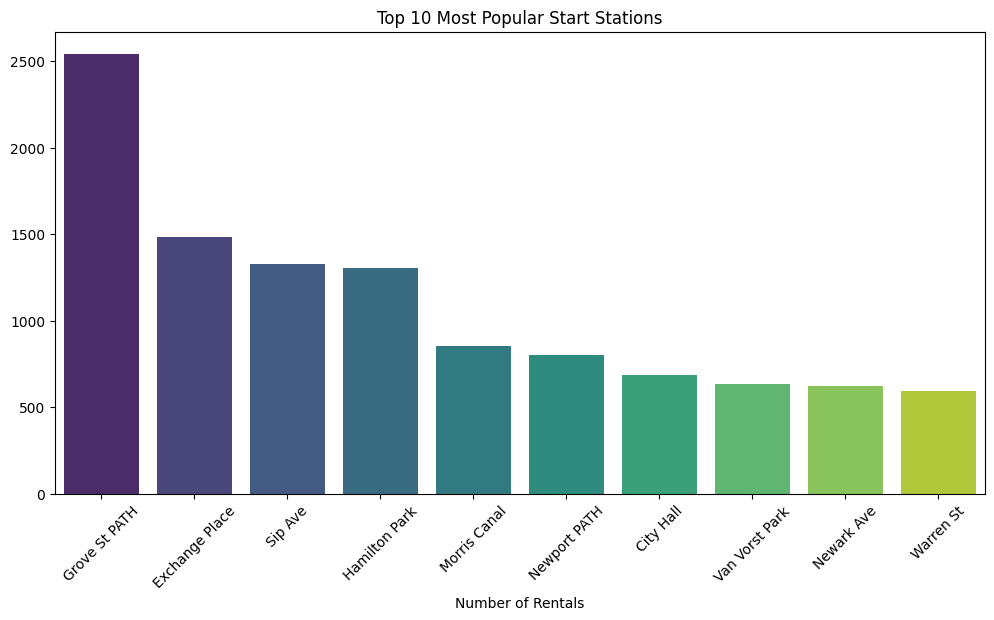


Top 10 Most Popular Start Stations


,count
Start Station Name,
Grove St PATH,2544
Exchange Place,1484
Sip Ave,1325
Hamilton Park,1305
Morris Canal,854
Newport PATH,802
City Hall,685
Van Vorst Park,634
Newark Ave,622


In [23]:
plt.figure(figsize=(12 ,6))
top_stations = df['Start Station Name'].value_counts().head(10)
sns.barplot(x=top_stations.index, y=top_station.values, palette='viridis')
plt.xticks(rotation = 45)
plt.xlabel('Start Station Name')
plt.xlabel('Number of Rentals')
plt.title('Top 10 Most Popular Start Stations')
plt.show()

print("\nTop 10 Most Popular Start Stations")
display(top_stations)

<ipython-input-27-9fd6a01898be>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_avg_duration = df.groupby("Age Group")['Trip_Duration_in_min'].mean().sort_values()
<ipython-input-27-9fd6a01898be>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_avg_duration.index, y=age_group_avg_duration.values, palette='coolwarm')


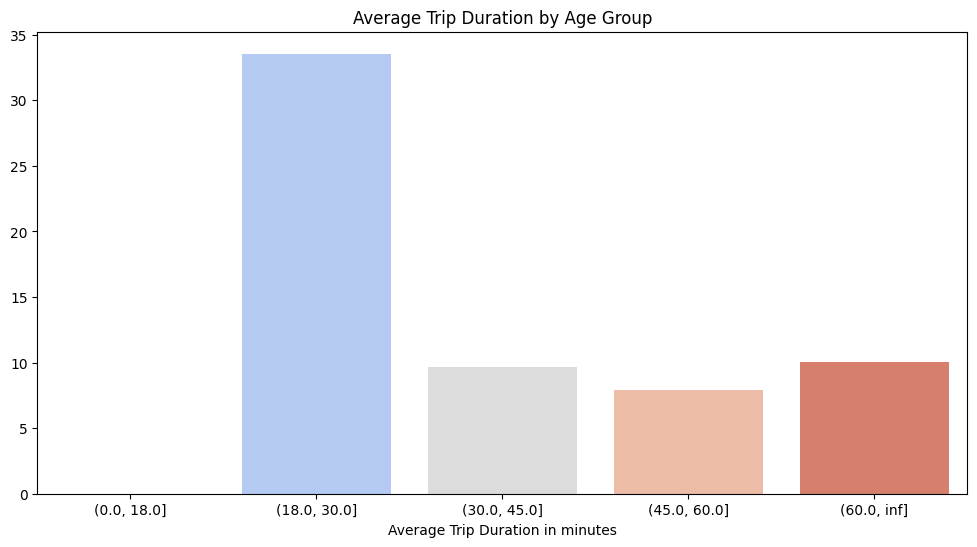


Average Trip Duration by Age Group


,Trip_Duration_in_min
Age Group,
"(45.0, 60.0]",7.894258
"(30.0, 45.0]",9.691405
"(60.0, inf]",10.031929
"(18.0, 30.0]",33.547771
"(0.0, 18.0]",NaN


In [27]:
plt.figure(figsize=(12 ,6))
age_group_avg_duration = df.groupby("Age Group")['Trip_Duration_in_min'].mean().sort_values()
sns.barplot(x=age_group_avg_duration.index, y=age_group_avg_duration.values, palette='coolwarm')
plt.xlabel('Age Group')
plt.xlabel('Average Trip Duration in minutes')
plt.title('Average Trip Duration by Age Group')
plt.show()

print("\nAverage Trip Duration by Age Group")
display(age_group_avg_duration)

<ipython-input-28-bde70a0ec7e1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='Blues_r')


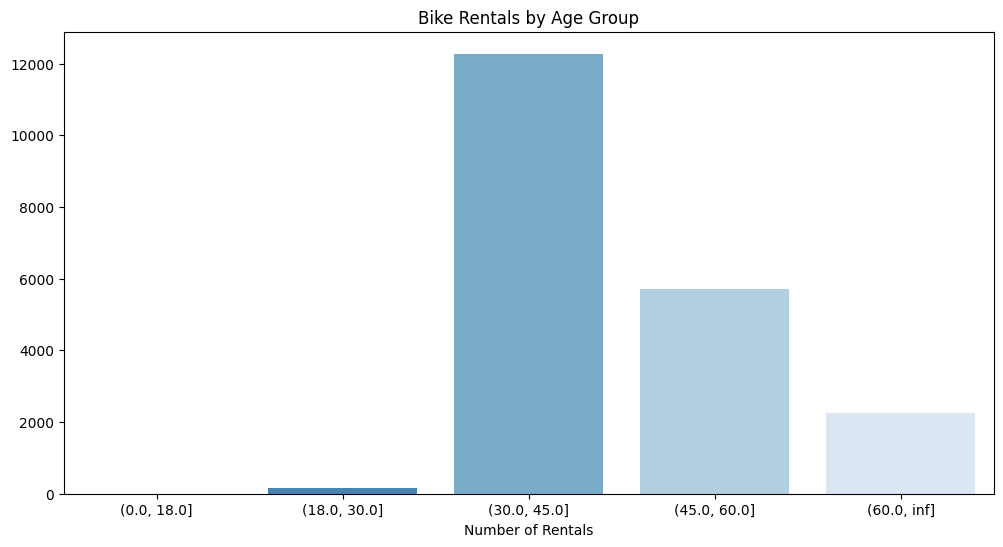


Bike Rentals by Age Group


,Trip_Duration_in_min
Age Group,
"(45.0, 60.0]",7.894258
"(30.0, 45.0]",9.691405
"(60.0, inf]",10.031929
"(18.0, 30.0]",33.547771
"(0.0, 18.0]",NaN


In [28]:
plt.figure(figsize=(12 ,6))
age_group_counts = df['Age Group'].value_counts().sort_index()
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='Blues_r')
plt.xlabel('Age Group')
plt.xlabel('Number of Rentals')
plt.title('Bike Rentals by Age Group')
plt.show()

print("\nBike Rentals by Age Group")
display(age_group_avg_duration)

<Figure size 1200x600 with 0 Axes>

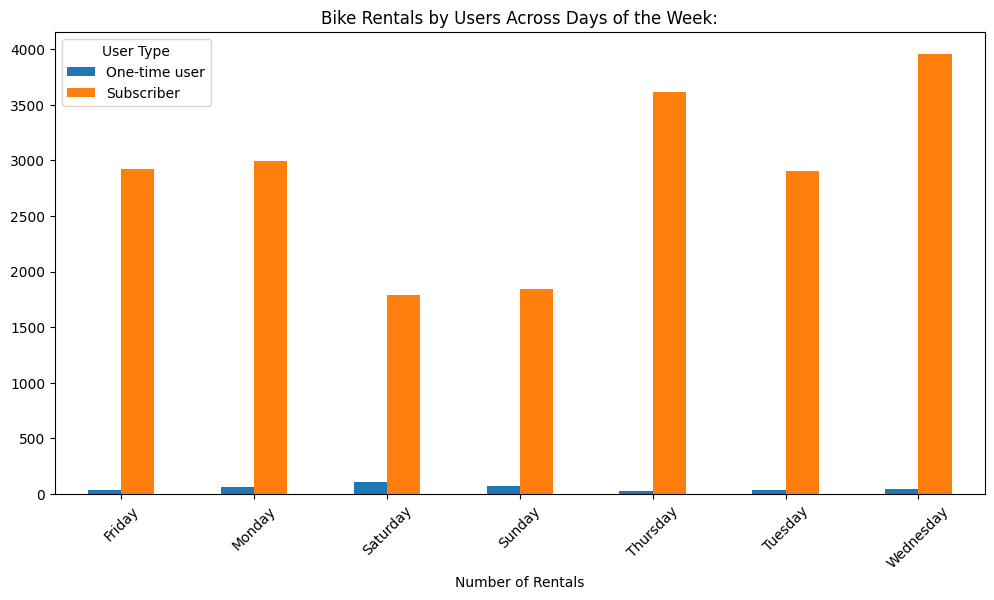


Bike Rentals by Users Across Days of the Week:


,Trip_Duration_in_min
Age Group,
"(45.0, 60.0]",7.894258
"(30.0, 45.0]",9.691405
"(60.0, inf]",10.031929
"(18.0, 30.0]",33.547771
"(0.0, 18.0]",NaN


In [32]:
plt.figure(figsize=(12 ,6))
user_type_weekday = df.groupby(['User Type', 'Day_of_Week']).size().unstack()
user_type_weekday.T.plot(kind='bar', figsize=(12,6))
plt.xlabel('Day of Week')
plt.xlabel('Number of Rentals')
plt.title('Bike Rentals by Users Across Days of the Week:')
plt.xticks(rotation=45)
plt.legend(title='User Type')
plt.show()


print("\nBike Rentals by Users Across Days of the Week:")
display(age_group_avg_duration)

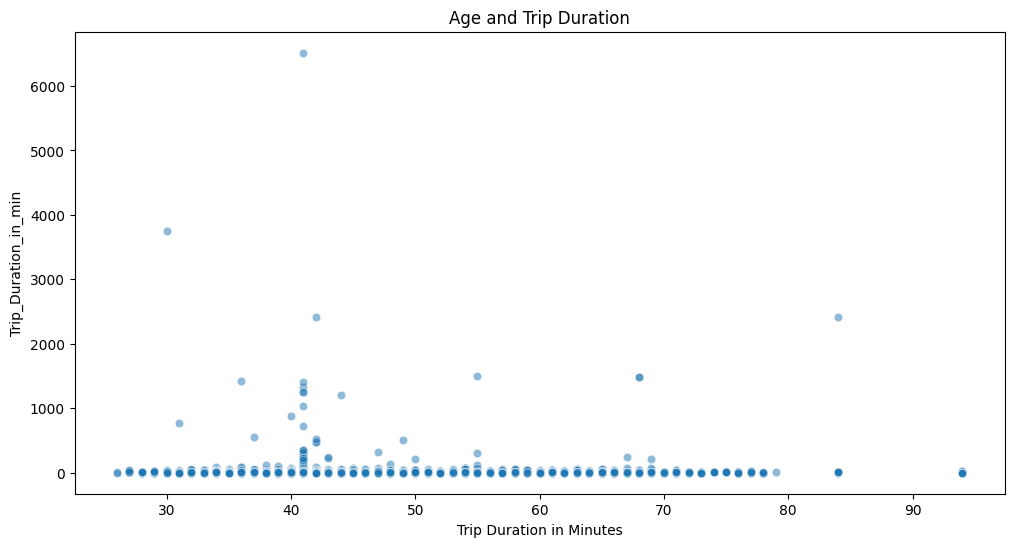


Age and Trip Duration


<ipython-input-38-23cec06aab5c>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_group_avg_duration = df.groupby("Age Group")['Trip_Duration_in_min'].mean()


,Trip_Duration_in_min
Age Group,
"(45.0, 60.0]",7.894258
"(30.0, 45.0]",9.691405
"(60.0, inf]",10.031929
"(18.0, 30.0]",33.547771
"(0.0, 18.0]",NaN


In [38]:
plt.figure(figsize=(12 ,6))
sns.scatterplot(x=df['Age'], y=df['Trip_Duration_in_min'], alpha=0.5)
plt.xlabel('User Age')
plt.xlabel('Trip Duration in Minutes')
plt.title('Age and Trip Duration')
plt.show()

avg_group_avg_duration = df.groupby("Age Group")['Trip_Duration_in_min'].mean()
print("\nAge and Trip Duration")
display(age_group_avg_duration)

In [39]:
df.to_csv('/content/New York Citi Bikes_Cleaned Data.csv, index=False')

print("\nThe file saved in the local in google colab")


The file saved in the local in google colab


In [49]:
import os
print(os.listdir("/content/"))


df.to_csv("/content/Citi_Bike_Cleaned.csv", index=False)


from google.colab import files
files.download("/content/Citi_Bike_Cleaned.csv")


['.config', 'New York Citi Bikes_Cleaned Data.csv, index=False', 'New York Citi Bikes_Raw Data.xlsx', 'Citi_Bike_Cleaned.csv', 'sample_data']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>